In [2]:
import codecs
import networkx as nx
import os
import pickle
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import write_dot
from os import listdir
from os.path import isfile, join
from utils import printProgressBar

# column number
rid = 0
fid = 1
lid_1 = 2
graph_1 = 3
ori_graph_1 = 4
lid_2 = 5
graph_2 = 6
ori_graph_2 = 7
cat_1 = 8
ori_cat_1 = 9
cat_2 = 10
ori_cat_2 = 11
ori_cple = 12
type_cstr_1 = 13
cstr_1 = 14
ori_cstr_1 = 15
type_cstr_2 = 16
cstr_2 = 17
ori_cstr_2 = 18
complexite = 19
ori_complexite = 20
orientation = 21
ori_orientation = 22
semty_1 = 23
ori_semty_1 = 24
semty_2 = 25
ori_semty_2 = 26
sous_semty_1 = 27
sous_semty_2 = 28
ori_sous_semty_1 = 29
ori_sous_semty_2 = 30
semtyrss_1 = 31
semtyrss_2 = 32
ori_semtyrss_1 = 33
ori_semtyrss_2 = 34
rel_sem_n1 = 35
rel_sem_n2 = 36
ori_relsem = 37
def_conc = 38
ori_def_conc = 39
def_abs = 40
ori_def_abs = 41
commentaires = 42
fichier_origine = 43

In [ ]:
# toggle1: Directed, Vertex: lexeme, categorie, semty. Edges: rel_sem, cstr
input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

for input_file in input_files:
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                if elements[23] == '' or elements[25] == '' or elements[36] == '':
                    continue
                
                vertices1 = list()
                vertices2 = list()
                if '|' in line_elements[23]:
                    vertices1.append(elements[graph_1] + '_' + elements[cat_1] + '_' + elements[semty_1].split('|')[0])
                    vertices1.append(elements[graph_1] + '_' + elements[cat_1] + '_' + elements[semty_1].split('|')[1])
                else:
                    vertices1.append(line_elements[graph_1] + '_' + line_elements[cat_1] + '_' + elements[semty_1])
                if '|' in line_elements[25]:
                    vertices2.append(elements[graph_2] + '_' + elements[cat_2] + '_' + elements[semty_2].split('|')[0])
                    vertices2.append(elements[graph_2] + '_' + elements[cat_2] + '_' + elements[semty_2].split('|')[1])
                else:
                    vertices2.append(elements[graph_2] + '_' + elements[cat_2] + '_' + elements[semty_2])
                
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    edge_type = line_elements[rel_sem_n2] + '_' + elements[cstr_1] + '-' + elements[cstr_2]
                    for v1 in vertices1:
                        for v2 in vertices2:
                            H.add_edge(v1, v2, label=edge_type)
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    edge_type = elements[rel_sem_n2] + '_' + elements[cstr_2] + '-' + elements[cstr_1]
                    for v1 in vertices1:
                        for v2 in vertices2:
                            H.add_edge(v2, v1, label=edge_type)
                else:
                    edge_type1 = elements[rel_sem_n2] + '_' + elements[cstr_1] + '-' + elements[cstr_2]
                    edge_type2 = elements[rel_sem_n2] + '_' + elements[cstr_2] + '-' + elements[cstr_1]
                    for v1 in vertices1:
                        for v2 in vertices2:
                            H.add_edge(v1, v2, label=edge_type1)
                            H.add_edge(v2, v1, label=edge_type2)
    write_dot(H, join('graphs edge_relsem_cstr', input_file.replace('.txt','.dot')))
    H.clear()

In [3]:
# toggle1: directed, vertex: lexeme, category. edges: orientation, complexite, cstr

def edge_writer(H):
    ret_str = ''
    edges = H.edges(data=True)
    for e in edges:
        if 'dir' in e[2]: 
            ret_str += e[0].split('_')[1] + ' -- ' + e[2]['label'].split(': ')[1] + ' -- ' + e[1].split('_')[1] + '; '
        elif 'color' in e[2]:
            ret_str += e[0].split('_')[1] + ' -? ' + e[2]['label'].split(': ')[1] + ' -? ' + e[1].split('_')[1] + '; '
        else:
            ret_str += e[0].split('_')[1] + ' -> ' + e[2]['label'].split(': ')[1] + ' -> ' + e[1].split('_')[1] + '; '
    return ret_str

def nodes_writer(H):
    nodes = H.nodes()
    nodes_temp = list()
    for node in nodes:
        nodes_temp.append(node.split('_')[0])
    return str(nodes_temp).replace('\'', '')

input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

f_summary = codecs.open('summary_of_family_groups.txt', 'w+', encoding='utf-8')
f_summary.write('group id\tnumber of lexemes\tnumber of pairs\tpairs\tnumber of families\tfamilies\n')
number_of_edges = []
number_of_families = []
words = ''
group_prec = ''
family_count = 0
H = nx.DiGraph()
counter = 0
for input_file in input_files:
    group_id = input_file.split(' ')[0].split('-')[0]
    if group_id != group_prec and group_prec != '':
        f_summary.write(group_prec + '\t' + str(len(H)) + '\t' + str(H.size()) + '\t')
        #if len(H.edges()) <= 3:
        f_summary.write(edge_writer(H)[:-2])
        f_summary.write('\t' + str(family_count) + '\t' + words[:-2] + '\n')
        number_of_edges.append(H.size())
        number_of_families.append(family_count)
        family_count = 0
        words = ''
    family_count += 1
    group_prec = input_file.split(' ')[0].split('-')[0]
    
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    edge_type = elements[fichier_origine] + ': ' + elements[complexite] + '_' + elements[cstr_1] + '-' + elements[cstr_2]
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=edge_type)
                    word = elements[graph_1]
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    edge_type = elements[fichier_origine] + ': ' + elements[complexite] + '_' + elements[cstr_2] + '-' + elements[cstr_1]
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=edge_type)
                    word = elements[graph_2]
                elif elements[orientation] == 'indirect':
                    sorted_lex = sorted([elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2]])
                    sorted_cstr = sorted([elements[cstr_1], elements[cstr_2]])
                    edge_type = elements[fichier_origine] + ': ' + elements[complexite] + '_' + sorted_cstr[0] + '-' + sorted_cstr[1]
                    H.add_edge(sorted_lex[0], sorted_lex[1], dir='none', style='dashed', label=edge_type)
                    word = sorted_lex[0].split('_')[0]
                elif elements[orientation] == 'NA':
                    sorted_lex = sorted([elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2]])
                    sorted_cstr = sorted([elements[cstr_1], elements[cstr_2]])
                    edge_type = elements[fichier_origine] + ': ' + elements[complexite] + '_' + sorted_cstr[0] + '-' + sorted_cstr[1]
                    H.add_edge(sorted_lex[0], sorted_lex[1], dir='none', style='dashed', color='gray', label=edge_type)
                    word = sorted_lex[0].split('_')[0]
                else:
                    print(input_file, elements[orientation])
        try:
            if not nx.is_weakly_connected(H):
                print(input_file)
        except:
            print('null graph', input_file)
    words += nodes_writer(H) + '; '
    write_dot(H, join('graph_visualization', input_file.replace('.txt','.dot')))
    counter += 1
    printProgressBar(counter, len(input_files), prefix = 'Progress:', suffix = 'complete', length = 50, decimals = 2)
f_summary.write(group_prec + '\t' + str(len(H)) + '\t' + str(H.size()) + '\t')
f_summary.write(edge_writer(H)[:-2])
f_summary.write('\t' + str(family_count) + '\t' + words[:-2] + '\n')
f_summary.close()
number_of_edges.append(H.size())
number_of_families.append(family_count)

Progress: |██████████████████████████████████████████████████| 100.00% complete


In [4]:
# toggle1: directed, vertex: lexeme, category. edges: orientation, cstr (FINGERPRINT)

def edge_writer(H):
    ret_str = ''
    edges = H.edges(data=True)
    for e in edges:
        ret_str += e[2]['label'].split(': ')[1] + '; '
    return ret_str[:-2]

def nodes_writer(H):
    nodes = H.nodes()
    nodes_temp = list()
    for node in nodes:
        nodes_temp.append(node.split('_')[0])
    return str(nodes_temp).replace('\'', '')

input_dir = 'families_fingerprint'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

f_summary = codecs.open('summary_of_family_groups_from_fingerprint.txt', 'w+', encoding='utf-8')
f_summary.write('group id\tnumber of lexemes\tnumber of pairs\tpairs\tnumber of families\tfamilies\n')
number_of_edges = []
number_of_families = []
words = ''
group_prec = ''
family_count = 0
H = nx.DiGraph()
counter = 0
for input_file in input_files:
    group_id = input_file.split(' ')[0].split('-')[0]
    if group_id != group_prec and group_prec != '':
        f_summary.write(group_prec + '\t' + str(len(H)) + '\t' + str(H.size()) + '\t')
        #if len(H.edges()) <= 3:
        f_summary.write(edge_writer(H))
        f_summary.write('\t' + str(family_count) + '\t' + words[:-2] + '\n')
        number_of_edges.append(H.size())
        number_of_families.append(family_count)
        family_count = 0
        words = ''
    family_count += 1
    group_prec = input_file.split(' ')[0].split('-')[0]
    
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    edge_type = elements[fichier_origine] + ': ' + elements[cstr_1] + '-' + elements[cstr_2]
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=edge_type)
                    word = elements[graph_1]
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    edge_type = elements[fichier_origine] + ': ' + elements[cstr_2] + '-' + elements[cstr_1]
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=edge_type)
                    word = elements[graph_2]
                elif elements[orientation] == 'NA':
                    sorted_lex = sorted([elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2]])
                    sorted_cstr = sorted([elements[cstr_1], elements[cstr_2]])
                    edge_type = elements[fichier_origine] + ': ' + sorted_cstr[0] + '-' + sorted_cstr[1]
                    H.add_edge(sorted_lex[0], sorted_lex[1], dir='none', style='dashed', label=edge_type)
                    word = sorted_lex[0].split('_')[0]
                else:  # orientation: indirect
                    pass
        try:
            if not nx.is_weakly_connected(H):
                print('not weakly connected', input_file)
        except:
            print('null graph', input_file)
    words += nodes_writer(H) + '; '
    write_dot(H, join('fingerprint_visualization', input_file.replace('.txt','.dot')))
    counter += 1
    printProgressBar(counter, len(input_files), prefix = 'Progress:', suffix = 'complete', length = 50, decimals = 2)
f_summary.write(group_prec + '\t' + str(len(H)) + '\t' + str(H.size()) + '\t')
f_summary.write(edge_writer(H))
f_summary.write('\t' + str(family_count) + '\t' + words[:-2] + '\n')
f_summary.close()
number_of_edges.append(H.size())
number_of_families.append(family_count)

null graph F01317 abducteur.txt------------------------------| 9.46% complete
null graph F01322 abréacteur.txt-----------------------------| 9.50% complete
null graph F01323 abréaction.txt-----------------------------| 9.51% complete
null graph F01329 accepteur.txt------------------------------| 9.55% complete
null graph F01343 acupuncteur.txt----------------------------| 9.65% complete
null graph F01345 adjudicateur.txt---------------------------| 9.67% complete
null graph F01347 adjudicatrice.txt--------------------------| 9.68% complete
null graph F01348 adjuteur.txt-------------------------------| 9.69% complete
null graph F01349 adjutrice.txt------------------------------| 9.69% complete
null graph F01360 agriculteur.txt----------------------------| 9.77% complete
null graph F01361 agricultrice.txt---------------------------| 9.78% complete
null graph F01381 apiculteur.txt-----------------------------| 9.92% complete
null graph F01382 apiculture.txt-----------------------------| 9

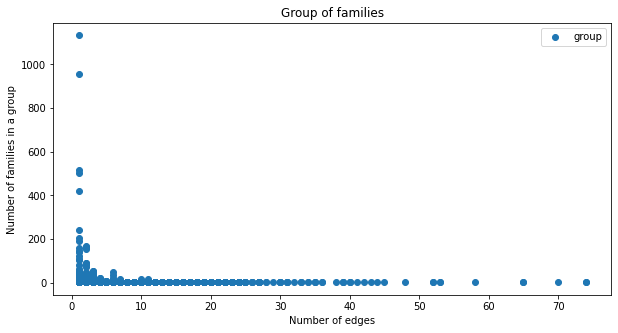

In [3]:
fig=plt.figure()
fig.set_size_inches(10, 5)
#ax=fig.add_axes([0,0,1,1])
ax = fig.add_subplot(111)
ax.scatter(number_of_edges, number_of_families, label='group')
ax.set_xlabel('Number of edges')
ax.set_ylabel('Number of families in a group')
ax.set_title('Group of families')
ax.legend()
plt.show()

In [4]:
# PDF generation
dot_dir = 'graph_visualization'
dot_files = [f for f in listdir(dot_dir) if isfile(join(dot_dir, f))]
counter = 0
for dot_file in dot_files:
    os.system('dot -Tpdf "' + join(dot_dir, dot_file) + '" -o "' + join(dot_dir, dot_file.replace('.dot', '.pdf')) + '"')
    counter += 1
    printProgressBar(counter, len(dot_files), prefix = 'Progress:', suffix = 'complete', length = 50, decimals = 2)

Progress: |██████████████████████████████████████████████████| 100.00% complete


## for gSpan. Directed. Vertex: cat_1, cat_2. edges: orientation, complexite, cstr_1, cstr_2

In [2]:
input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

edge_labels = list()
vertex_labels = list()
family_labels = list()
fam_prec = ''
f_out = codecs.open('for_gSpan.txt', 'w+', encoding='utf-8')
for input_file in input_files:
    #if '-' in input_file and input_file.split('-')[0] == fam_prec:
        #continue
    fam_prec = input_file.split('-')[0]
    H = nx.DiGraph()
    family_number = input_file.split()[0]#.replace('F', '')
    family_labels.append(family_number)
    f_out.write('t # ' + family_number + '\n')
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                
                vertex_a_type = elements[cat_1]
                try:
                    vertex_a_label = vertex_labels.index(vertex_a_type)
                except ValueError:
                    vertex_a_label = len(vertex_labels)
                    vertex_labels.append(vertex_a_type)
                vertex_b_type = elements[cat_2]
                try:
                    vertex_b_label = vertex_labels.index(vertex_b_type)
                except ValueError:
                    vertex_b_label = len(vertex_labels)
                    vertex_labels.append(vertex_b_type)
                H.add_node(elements[graph_1] + '_' + elements[cat_1], label=vertex_a_label)
                H.add_node(elements[graph_2] + '_' + elements[cat_2], label=vertex_b_label)
                    
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    edge_type = elements[complexite] + '_' + elements[cstr_1] + '-' + elements[cstr_2] 
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    edge_type = elements[complexite] + '_' + elements[cstr_2] + '-' + elements[cstr_1] 
                else:  # NA or indirect
                    sorted_cstr = sorted([elements[cstr_1], elements[cstr_2]])
                    edge_type = elements[complexite] + '_' + elements[orientation] + '_' + sorted_cstr[0] + '-' + sorted_cstr[1]
                try:
                    edge_label = edge_labels.index(edge_type)
                except ValueError:
                    edge_label = len(edge_labels)
                    edge_labels.append(edge_type)
                    
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2], label=edge_label)
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1], label=edge_label)
                else:
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2], label=edge_label)
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1], label=edge_label)
        node_list = list(H.nodes)
        for node_idx, node in enumerate(node_list):
            f_out.write('v ' + str(node_idx) + ' ' + str(H.nodes[node]['label']) + '\n')
            #print('v ' + str(node_idx) + ' ' + str(H.nodes[node]['label']))
        for edge in list(H.edges):
            f_out.write('e ' + str(node_list.index(edge[0])) + ' ' + str(node_list.index(edge[1])) + ' ' + str(H[edge[0]][edge[1]]['label']) + '\n')
            #print('e ' + str(node_list.index(edge[0])) + ' ' + str(node_list.index(edge[1])) + ' ' + str(H[edge[0]][edge[1]]['label']))
f_out.close()

In [3]:
# after writing file for gSpan
vertex_label_file = open('label_vertex.p', 'wb')
pickle.dump(vertex_labels, vertex_label_file)
vertex_label_file.close()

edge_label_file = open('label_edge.p', 'wb')
pickle.dump(edge_labels, edge_label_file)
edge_label_file.close()

family_label_file = open('label_family.p', 'wb')
pickle.dump(family_labels, family_label_file)
family_label_file.close()

## for context directly. Vertex: cat_1, cat_2. edges: orientation, complexite, cstr_1, cstr_2

In [2]:
input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
output_dir = 'graph_binary'

for input_file in input_files:
    fam_id = input_file.split()[0]
    group_id = fam_id.split('-')[0]
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                H.add_node(elements[graph_1] + '_' + elements[cat_1], label=elements[cat_1])
                H.add_node(elements[graph_2] + '_' + elements[cat_2], label=elements[cat_2])
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=elements[complexite] + '_' + elements[cstr_1] + '-' + elements[cstr_2])
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=elements[complexite] + '_' + elements[cstr_2] + '-' + elements[cstr_1])
                else:
                    sorted_cstr = sorted([elements[cstr_1], elements[cstr_2]])
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=elements[complexite] + '_' + elements[orientation] + '_' + sorted_cstr[0] + '-' + sorted_cstr[1])
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=elements[complexite] + '_' + elements[orientation] + '_' + sorted_cstr[0] + '-' + sorted_cstr[1])
    graph_file = open(join(output_dir, fam_id), 'wb')
    pickle.dump(H, graph_file)
    graph_file.close()

## for context directly. Vertex: {} . edges: cstr_1, cstr_2

In [4]:
input_dir = 'families_fingerprint'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
output_dir = 'fingerprint_binary'

for input_file in input_files:
    fam_id = input_file.split()[0]
    group_id = fam_id.split('-')[0]
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                elements = line.replace('\n','').replace(' ','').split('\t')
                H.add_node(elements[graph_1] + '_' + elements[cat_1], label='')
                H.add_node(elements[graph_2] + '_' + elements[cat_2], label='')
                if elements[orientation] == 'as2de' or elements[orientation] == 'as2des':
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=elements[cstr_1] + '-' + elements[cstr_2])
                elif elements[orientation] == 'de2as' or elements[orientation] == 'des2as':
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=elements[cstr_2] + '-' + elements[cstr_1])
                elif elements[orientation] == 'NA':
                    H.add_edge(elements[graph_1] + '_' + elements[cat_1], elements[graph_2] + '_' + elements[cat_2],\
                               label=elements[cstr_1] + '-' + elements[cstr_2])
                    H.add_edge(elements[graph_2] + '_' + elements[cat_2], elements[graph_1] + '_' + elements[cat_1],\
                               label=elements[cstr_2] + '-' + elements[cstr_1])
                else:  # orientation: indirect
                    pass
    if H.size() < 1:  # no edge
        continue
    graph_file = open(join(output_dir, fam_id), 'wb')
    pickle.dump(H, graph_file)
    graph_file.close()

# misc

In [ ]:
# toggle1: using write_dot for all families, directed, no cstr in edges
input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

for input_file in input_files:
    H = nx.DiGraph()
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                line_elements = line.replace('\n','').split('\t')
                orientation = line_elements[21]
                if orientation == 'as2de' or orientation == 'as2des' or orientation == 'de2as' or orientation == 'des2as':
                    orientation = 'direct'
                edge_type = orientation + '_' + line_elements[19]
                if line_elements[21] == 'as2de' or line_elements[21] == 'as2des':
                    H.add_edge(line_elements[3] + '_' + line_elements[8], line_elements[6] + '_' + line_elements[10], label=edge_type)
                elif line_elements[21] == 'de2as' or line_elements[21] == 'des2as':
                    H.add_edge(line_elements[6] + '_' + line_elements[10], line_elements[3] + '_' + line_elements[8], label=edge_type)
                else:
                    H.add_edge(line_elements[3] + '_' + line_elements[8], line_elements[6] + '_' + line_elements[10], label=edge_type)
                    H.add_edge(line_elements[6] + '_' + line_elements[10], line_elements[3] + '_' + line_elements[8], label=edge_type)
        try:
            if not nx.is_weakly_connected(H):
                print(input_file)
        except:
            print('null graph', input_file)
    write_dot(H, join('graphs_directed', input_file.replace('.txt','.dot')))

In [ ]:
# toggle1: create directed graph for gSpan input, cstr in vertices
input_dir = 'families'
input_files = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]

edge_labels = list()
vertex_labels = list()

f_out = codecs.open('for_gSpan.txt', 'w+', encoding='utf-8')
for input_file in input_files:
    #if input_file != 'F01531 instrumentateur_Nm.txt':
        #continue
    H = nx.DiGraph()
    family_number = input_file.split()[0].replace('F', '')
    f_out.write('t # ' + family_number + '\n')
    with codecs.open(join(input_dir, input_file), 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            if line_num >= 2:
                line_elements = line.replace('\n','').split('\t')
                
                vertex_a_type = line_elements[8] + '_' + line_elements[14]
                try:
                    vertex_a_label = vertex_labels.index(vertex_a_type)
                except ValueError:
                    vertex_a_label = len(vertex_labels)
                    vertex_labels.append(vertex_a_type)
                vertex_b_type = line_elements[10] + '_' + line_elements[17]
                try:
                    vertex_b_label = vertex_labels.index(vertex_b_type)
                except ValueError:
                    vertex_b_label = len(vertex_labels)
                    vertex_labels.append(vertex_b_type)
                H.add_node(line_elements[3] + '_' + line_elements[8], label=vertex_a_label)
                H.add_node(line_elements[6] + '_' + line_elements[10], label=vertex_b_label)
                    
                orientation = line_elements[21]
                if orientation == 'as2de' or orientation == 'as2des' or orientation == 'de2as' or orientation == 'des2as':
                    orientation = 'direct'
                edge_type = orientation + '_' + line_elements[19]
                try:
                    edge_label = edge_labels.index(edge_type)
                except ValueError:
                    edge_label = len(edge_labels)
                    edge_labels.append(edge_type)
                    
                if line_elements[21] == 'as2de' or line_elements[21] == 'as2des':
                    H.add_edge(line_elements[3] + '_' + line_elements[8], line_elements[6] + '_' + line_elements[10], label=edge_label)
                elif line_elements[21] == 'de2as' or line_elements[21] == 'des2as':
                    H.add_edge(line_elements[6] + '_' + line_elements[10], line_elements[3] + '_' + line_elements[8], label=edge_label)
                else:
                    H.add_edge(line_elements[3] + '_' + line_elements[8], line_elements[6] + '_' + line_elements[10], label=edge_label)
                    H.add_edge(line_elements[6] + '_' + line_elements[10], line_elements[3] + '_' + line_elements[8], label=edge_label)
        node_list = list(H.nodes)
        for node_idx, node in enumerate(node_list):
            f_out.write('v ' + str(node_idx) + ' ' + str(H.nodes[node]['label']) + '\n')
            #print('v ' + str(node_idx) + ' ' + str(H.nodes[node]['label']))
        for edge in list(H.edges):
            f_out.write('e ' + str(node_list.index(edge[0])) + ' ' + str(node_list.index(edge[1])) + ' ' + str(H[edge[0]][edge[1]]['label']) + '\n')
f_out.close()
print(vertex_labels)
print(edge_labels)